In [763]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt 
import seaborn as sb
import mglearn
import graphviz





Data exploration

In [764]:
data = pd.read_csv('train.csv')

data.info()
print(data.head())
print(data.describe())
data.isna().sum()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

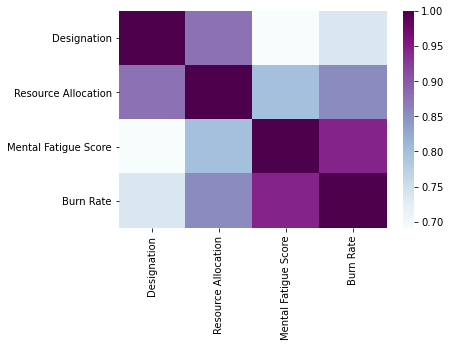

In [765]:
correlation_plot = sb.heatmap(data.corr(), cmap='BuPu')
plt.show()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


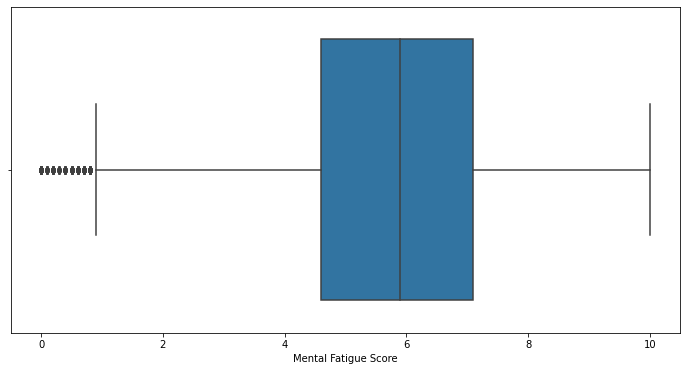

In [766]:
plt.figure(figsize=(12,6))
sb.boxplot(data['Mental Fatigue Score'])
plt.show()



Data preprocessing

In [767]:

data = data.drop(['Employee ID', 'Date of Joining'], axis = 1) #excluding "Employee ID" column from the data (not relevant for modelling)

df = data.dropna() #dropping the rows where there is NaN value in any column
print(df)

df['Burn Rate'].isna().sum()

       Gender Company Type WFH Setup Available  Designation  \
0      Female      Service                  No          2.0   
1        Male      Service                 Yes          1.0   
3        Male      Service                 Yes          1.0   
4      Female      Service                  No          3.0   
5        Male      Product                 Yes          2.0   
...       ...          ...                 ...          ...   
22743  Female      Product                 Yes          1.0   
22744    Male      Product                  No          3.0   
22746  Female      Product                 Yes          3.0   
22748  Female      Service                  No          2.0   
22749    Male      Product                  No          3.0   

       Resource Allocation  Mental Fatigue Score  Burn Rate  
0                      3.0                   3.8       0.16  
1                      2.0                   5.0       0.36  
3                      1.0                   2.6       0.

0

In [768]:
print(df["Gender"].value_counts())
print(df['Company Type'].value_counts())
print(df['WFH Setup Available'].value_counts())

df['Gender'] = data['Gender'].replace(['Female', 'Male'], [0, 1])
df['Company Type'] = data['Company Type'].replace(['Product', 'Service'], [0, 1])
df['WFH Setup Available'] = data['WFH Setup Available'].replace(['No', 'Yes'], [0, 1])





print(df)

Female    9747
Male      8843
Name: Gender, dtype: int64
Service    12174
Product     6416
Name: Company Type, dtype: int64
Yes    10030
No      8560
Name: WFH Setup Available, dtype: int64
       Gender  Company Type  WFH Setup Available  Designation  \
0           0             1                    0          2.0   
1           1             1                    1          1.0   
3           1             1                    1          1.0   
4           0             1                    0          3.0   
5           1             0                    1          2.0   
...       ...           ...                  ...          ...   
22743       0             0                    1          1.0   
22744       1             0                    0          3.0   
22746       0             0                    1          3.0   
22748       0             1                    0          2.0   
22749       1             0                    0          3.0   

       Resource Allocation  M

<ipython-input-768-481fff84b73b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = data['Gender'].replace(['Female', 'Male'], [0, 1])
<ipython-input-768-481fff84b73b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company Type'] = data['Company Type'].replace(['Product', 'Service'], [0, 1])
<ipython-input-768-481fff84b73b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

Data modelling

In [769]:

y = df['Burn Rate']
X = df.drop('Burn Rate', axis = 1)

#print(y)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler() #applying StandarScaler
scaler.fit(X_train)
X_train_s = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index) #taken from the kaggle notebook
print(X_train)

X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
print(X_test)



       Gender  Company Type  WFH Setup Available  Designation  \
12166       1             0                    0          3.0   
7365        1             1                    0          3.0   
21421       0             1                    1          2.0   
9933        1             1                    0          3.0   
777         1             1                    0          2.0   
...       ...           ...                  ...          ...   
11313       0             1                    1          1.0   
16107       0             0                    0          3.0   
12081       0             0                    1          2.0   
13253       0             0                    0          3.0   
3325        1             1                    1          1.0   

       Resource Allocation  Mental Fatigue Score  
12166                  7.0                   8.0  
7365                   7.0                   6.4  
21421                  3.0                   5.2  
9933           

Models with StandardScaler

LinearRegression train score 0.9213002411038812
LinearRegression test score 0.9186506933888854
Ridge train score 0.9213002355026392
Ridge test score 0.9186509742393502
Decision Tree train score 0.8058630903484058
Decision Tree test score 0.7968049927028417


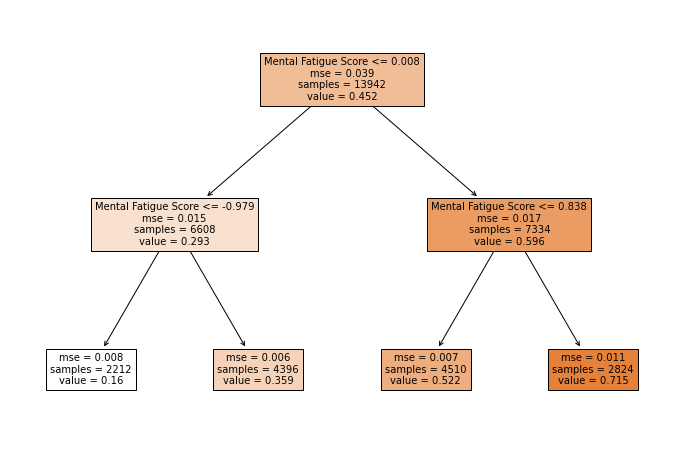

Random Forest train score 0.9524317266492208
Random Forest test score 0.9122003200174782
MLP Regressor train score 0.9258013382764286
MLP Regressor test score 0.9213244752004836
SVR train score 0.9136633279867236
SVR test score 0.9109707834224049


In [770]:
linreg = LinearRegression().fit(X_train_s, y_train)
print('LinearRegression train score', linreg.score(X_train_s, y_train))
print('LinearRegression test score', linreg.score(X_test_s, y_test))


ridge = Ridge().fit(X_train_s, y_train)
print('Ridge train score', ridge.score(X_train_s, y_train))
print('Ridge test score', ridge.score(X_test_s, y_test))

tree_reg = DecisionTreeRegressor(max_depth=2).fit(X_train_s, y_train)
print('Decision Tree train score', tree_reg.score(X_train_s, y_train))
print('Decision Tree test score', tree_reg.score(X_test_s, y_test))

plt.figure(figsize=(12,8))
plot_tree(tree_reg, feature_names=df.columns, filled=True)
plt.show()


random_forest = RandomForestRegressor(n_estimators=1000, random_state=3).fit(X_train_s, y_train)
print('Random Forest train score', random_forest.score(X_train_s, y_train))
print('Random Forest test score', random_forest.score(X_test_s, y_test))

mlp_regressor = MLPRegressor().fit(X_train_s, y_train)
print('MLP Regressor train score', mlp_regressor.score(X_train_s, y_train))
print('MLP Regressor test score', mlp_regressor.score(X_test_s, y_test))

svr_model = SVR().fit(X_train_s, y_train)
print('SVR train score', svr_model.score(X_train_s, y_train))
print('SVR test score', svr_model.score(X_test_s, y_test))







Parameter tunnig - Random Forest

In [771]:
n_list = [5, 10, 50, 100, 1000]
results_list = []

for n_value in n_list:
    forest_clf = RandomForestRegressor(n_estimators=n_value).fit(X_train_s, y_train)
    results = (forest_clf.score(X_train_s, y_train), forest_clf.score(X_test_s, y_test), n_value)
    results_list.append(results)

for res in results_list:
    print('Random Forest Train score: ',res[0], 'Random Forest Test score: ',res[1], 'n_value ',res[2])





Random Forest Train score:  0.9485369273346054 Random Forest Test score:  0.9084245432779907 n_value  5
Random Forest Train score:  0.9505084070891061 Random Forest Test score:  0.9093633779214062 n_value  10
Random Forest Train score:  0.9520825722937997 Random Forest Test score:  0.911634727883838 n_value  50
Random Forest Train score:  0.9522606774569768 Random Forest Test score:  0.9119773103510236 n_value  100
Random Forest Train score:  0.9524399861719901 Random Forest Test score:  0.9120874944086927 n_value  1000


Testing different values of alpha parameter - Ridge Regression

In [772]:

alpha_list = [0.001, 0.01, 1, 10]
ridge_results = []
for a in alpha_list:
    ridge_clf = Ridge(alpha=a).fit(X_train_s, y_train)
    results = ridge_clf.score(X_train_s, y_train), ridge_clf.score(X_test_s, y_test), a
    ridge_results.append(results)

for res in ridge_results:
    print('Ridge Train score ', res[0], 'Ridge Test score ', res[1], 'Alpha value ', res[2])


Ridge Train score  0.9213002411038757 Ridge Test score  0.9186506936754919 Alpha value  0.001
Ridge Train score  0.9213002411033209 Ridge Test score  0.9186506962544326 Alpha value  0.01
Ridge Train score  0.9213002355026392 Ridge Test score  0.9186509742393502 Alpha value  1
Ridge Train score  0.9212996832363947 Ridge Test score  0.9186529856271121 Alpha value  10


Testing different values of max_depth - Decision Tree

In [773]:
depth_values = [2, 3, 5, 10, None]
decision_tree_results = []
for v in depth_values:
    decision_tree_clf = DecisionTreeRegressor(max_depth=v).fit(X_train_s, y_train)
    results = decision_tree_clf.score(X_train_s, y_train), decision_tree_clf.score(X_test_s, y_test), v
    decision_tree_results.append(results)

for res in decision_tree_results:
    print('Decision Tree Train score ', res[0], 'Decision Tree Test score ', res[1], 'Depth value ', res[2])



Decision Tree Train score  0.8058630903484058 Decision Tree Test score  0.7968049927028416 Depth value  2
Decision Tree Train score  0.876959760148396 Decision Tree Test score  0.8677330491684359 Depth value  3
Decision Tree Train score  0.9170566463348879 Decision Tree Test score  0.9099216237018484 Depth value  5
Decision Tree Train score  0.9370014005816499 Decision Tree Test score  0.9196655416815079 Depth value  10
Decision Tree Train score  0.9539026913835904 Decision Tree Test score  0.8988835866082132 Depth value  None


Partameter tuning - MLP

In [774]:
hidden_layer_values = [100, 120, 150, 200, 300]
mlp_regressor_results = []
for v in hidden_layer_values:
    mlp_regressor_clf = MLPRegressor(hidden_layer_sizes=v).fit(X_train_s, y_train)
    results = mlp_regressor_clf.score(X_train_s, y_train), mlp_regressor_clf.score(X_test_s, y_test), v
    mlp_regressor_results.append(results)

for res in mlp_regressor_results:
    print('MLP Train score ', res[0], 'MLP Test score ', res[1], 'Hidden layers size ', res[2])


MLP Train score  0.9267767150047743 MLP Test score  0.9224484586928602 Hidden layers size  100
MLP Train score  0.9273628049568773 MLP Test score  0.9229682652187325 Hidden layers size  120
MLP Train score  0.9259628685132731 MLP Test score  0.9214296583949327 Hidden layers size  150
MLP Train score  0.9263575238850961 MLP Test score  0.9225802795383021 Hidden layers size  200
MLP Train score  0.9276177100750186 MLP Test score  0.9228245415220437 Hidden layers size  300


Feature importances - Random Forest

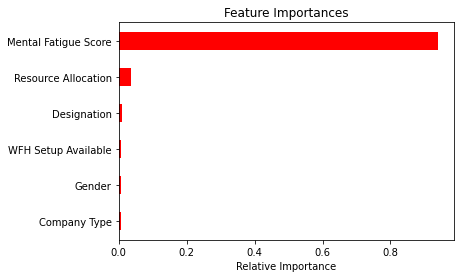

In [775]:

features = df.columns #taken from https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center', height=0.5)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Creating model without "Mental Fatigue Score"

In [776]:
y2 = df['Burn Rate']
X2 = df.drop(['Burn Rate', 'Mental Fatigue Score'], axis=1)

#print(y)
#print(X)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

scaler = StandardScaler() #applying StandarScaler
scaler.fit(X2_train)
X2_train_s = pd.DataFrame(scaler.transform(X2_train), columns=X2_train.columns, index=X2_train.index) #taken from the kaggle notebook
print(X2_train)

X2_test_s = pd.DataFrame(scaler.transform(X2_test), columns=X2_test.columns, index=X2_test.index)
print(X2_test)



       Gender  Company Type  WFH Setup Available  Designation  \
12166       1             0                    0          3.0   
7365        1             1                    0          3.0   
21421       0             1                    1          2.0   
9933        1             1                    0          3.0   
777         1             1                    0          2.0   
...       ...           ...                  ...          ...   
11313       0             1                    1          1.0   
16107       0             0                    0          3.0   
12081       0             0                    1          2.0   
13253       0             0                    0          3.0   
3325        1             1                    1          1.0   

       Resource Allocation  
12166                  7.0  
7365                   7.0  
21421                  3.0  
9933                   5.0  
777                    5.0  
...                    ...  
11313           

Models without "Mental Fatigue Score" and with StandardScaler

In [777]:
linreg = LinearRegression().fit(X2_train_s, y2_train)
print('LinearRegression train score', linreg.score(X2_train_s, y2_train))
print('LinearRegression test score', linreg.score(X2_test_s, y2_test))

ridge = Ridge().fit(X2_train_s, y2_train)
print('Ridge train score', ridge.score(X2_train_s, y2_train))
print('Ridge test score', ridge.score(X2_test_s, y2_test))

tree_reg = DecisionTreeRegressor(max_depth=3).fit(X2_train_s, y2_train)
print('Decision Tree train score', tree_reg.score(X2_train_s, y2_train))
print('Decision Tree test score', tree_reg.score(X2_test_s, y2_test))



random_forest = RandomForestRegressor(n_estimators=1000, random_state=3).fit(X2_train_s, y2_train)
print('Random Forest train score', random_forest.score(X2_train_s, y2_train))
print('Random Forest test score', random_forest.score(X2_test_s, y2_test))

mlp_regressor = MLPRegressor().fit(X2_train_s, y2_train)
print('MLP Regressor train score', mlp_regressor.score(X2_train_s, y2_train))
print('MLP Regressor test score', mlp_regressor.score(X2_test_s, y2_test))

svr_model = SVR().fit(X2_train_s, y2_train)
print('SVR train score', svr_model.score(X2_train_s, y2_train))
print('SVR test score', svr_model.score(X2_test_s, y2_test))

LinearRegression train score 0.739005783373335
LinearRegression test score 0.7315953171258204
Ridge train score 0.7390057632225784
Ridge test score 0.7315966439619103
Decision Tree train score 0.7290730782314282
Decision Tree test score 0.7218130386064763
Random Forest train score 0.7567537454883823
Random Forest test score 0.7425611645162482
MLP Regressor train score 0.7491652588892019
MLP Regressor test score 0.7381719707819147
SVR train score 0.7536692337601302
SVR test score 0.7428828209934369


Random Fores feature importance , StandardScaler - without "Mental Fatigue Score" 

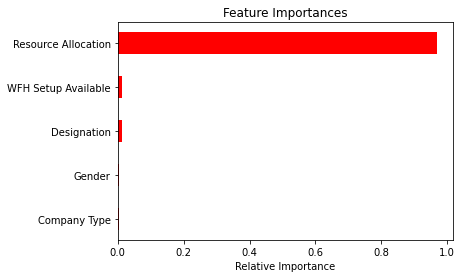

In [778]:
features = df.columns #taken from https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center', height=0.5)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Parameter tuning in model 2

In [779]:
n_list = [5, 10, 50, 100, 1000] #Random forest
results_list = []

for n_value in n_list:
    forest_clf = RandomForestRegressor(n_estimators=n_value).fit(X2_train_s, y2_train)
    results = (forest_clf.score(X2_train_s, y2_train), forest_clf.score(X2_test_s, y2_test), n_value)
    results_list.append(results)

for res in results_list:
    print('Random Forest Train score: ',res[0], 'Random Forest Test score: ',res[1], 'n_value ',res[2])




alpha_list = [0.001, 0.01, 1, 10] #Ridge regression
ridge_results = []
for a in alpha_list:
    ridge_clf = Ridge(alpha=a).fit(X2_train_s, y2_train)
    results = ridge_clf.score(X2_train_s, y2_train), ridge_clf.score(X2_test_s, y2_test), a
    ridge_results.append(results)

for res in ridge_results:
    print('Ridge Train score ', res[0], 'Ridge Test score ', res[1], 'Alpha value ', res[2])



depth_values = [2, 3, 5, 10, None] #Decison Tree
decision_tree_results = []
for v in depth_values:
    decision_tree_clf = DecisionTreeRegressor(max_depth=v).fit(X2_train_s, y2_train)
    results = decision_tree_clf.score(X2_train_s, y2_train), decision_tree_clf.score(X2_test_s, y2_test), v
    decision_tree_results.append(results)

for res in decision_tree_results:
    print('Decision Tree Train score ', res[0], 'Decision Tree Test score ', res[1], 'Depth value ', res[2])


hidden_layer_values = [100, 120, 150, 200, 300] #MLP Regressor
mlp_regressor_results = []
for v in hidden_layer_values:
    mlp_regressor_clf = MLPRegressor(hidden_layer_sizes=v).fit(X2_train_s, y2_train)
    results = mlp_regressor_clf.score(X2_train_s, y2_train), mlp_regressor_clf.score(X2_test_s, y2_test), v
    mlp_regressor_results.append(results)

for res in mlp_regressor_results:
    print('MLP Train score ', res[0], 'MLP Test score ', res[1], 'Hidden layers size ', res[2])



Random Forest Train score:  0.75627723012291 Random Forest Test score:  0.741348766368707 n_value  5
Random Forest Train score:  0.7564638286737276 Random Forest Test score:  0.7423961438243687 n_value  10
Random Forest Train score:  0.7567071792038814 Random Forest Test score:  0.7423651975798056 n_value  50
Random Forest Train score:  0.7567354377008995 Random Forest Test score:  0.7424501690021473 n_value  100
Random Forest Train score:  0.756754345048099 Random Forest Test score:  0.7424841277198047 n_value  1000
Ridge Train score  0.7390057833733148 Ridge Test score  0.7315953184741 Alpha value  0.001
Ridge Train score  0.7390057833713175 Ridge Test score  0.7315953306066814 Alpha value  0.01
Ridge Train score  0.7390057632225784 Ridge Test score  0.7315966439619103 Alpha value  1
Ridge Train score  0.7390037890938368 Ridge Test score  0.7316066755046414 Alpha value  10
Decision Tree Train score  0.6710356304728762 Decision Tree Test score  0.6610590557725302 Depth value  2
Decisi